In [17]:
# Librerías y configuración

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings   
import numpy as np
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [33]:
# Se cargan los datos

df = pd.read_csv('../final_data//data.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,fecha,intensidad,estacion,magnitud,unidad_medida,valores
0,2022-12-10 10:00:00,349.37503,Escuelas Aguirre,Monóxido de Nitrógeno,ug/m3,3.0
1,2022-12-10 10:00:00,349.37503,Calle Farolillo,Dióxido de Nitrógeno,ug/m3,16.0
2,2022-12-10 10:00:00,349.37503,Pza. del Carmen,Óxidos de Nitrógeno,ug/m3,46.0
3,2022-12-10 10:00:00,349.37503,Méndez Álvaro,Dióxido de Nitrógeno,ug/m3,20.0
4,2022-12-10 10:00:00,349.37503,Urb. Embajada (Barajas),Partículas < 10 um,ug/m3,13.0


In [3]:
df.magnitud.unique()

array(['Monóxido de Nitrógeno', 'Dióxido de Nitrógeno',
       'Óxidos de Nitrógeno', 'Partículas < 10 um',
       'Dióxido de Azufre', 'Tolueno', 'Etilbenceno',
       'Partículas < 2.5 um', 'Ozono', 'Monóxido de Carbono', 'Benceno',
       'Metano', 'Hidrocarburos no metánicos', 'Hidrocarburos totales'],
      dtype=object)

In [5]:
# quiero tener una columna con cada magnitud y sus valores

df_magnitudes = df.pivot_table(index='fecha', columns='magnitud', values='valores')

# quiero LLENAR LOS NULOS con el valor anterior

df_magnitudes = df_magnitudes.fillna(method='ffill')

df_magnitudes

magnitud,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Etilbenceno,Hidrocarburos no metánicos,Hidrocarburos totales,Metano,Monóxido de Carbono,Monóxido de Nitrógeno,Ozono,Óxidos de Nitrógeno,Partículas < 10 um,Partículas < 2.5 um,Tolueno
fecha,,,,,,,,,,,,,,
2015-10-10 10:00:00,0.650,4.714286,40.333333,0.300,NaN,NaN,1.406667,0.375000,28.250000,11.830000,80.250000,15.833333,4.666667,2.400
2015-10-10 11:00:00,0.425,10.000000,45.666667,0.300,0.226667,1.626667,1.406667,0.316667,25.333333,24.181250,86.166667,16.000000,9.666667,3.550
2015-10-10 12:00:00,1.150,5.000000,42.916667,0.325,0.226667,1.626667,1.383333,0.250000,18.416667,32.308333,69.833333,20.333333,14.666667,2.925
2015-10-10 13:00:00,0.450,8.666667,49.166667,0.850,0.210000,1.583333,1.383333,0.333333,19.333333,36.700000,77.750000,22.833333,10.333333,3.900
2015-10-10 14:00:00,1.600,5.714286,44.166667,0.425,0.210000,1.583333,1.423333,0.300000,15.666667,51.423333,67.166667,23.166667,16.000000,4.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.400,2.666667,72.357143,0.260,0.280000,1.200000,0.960000,0.400000,39.600000,13.073333,125.181818,34.142857,16.666667,1.460
2022-12-31 20:00:00,0.980,2.000000,74.700000,0.100,0.280000,1.200000,0.960000,0.766667,93.214286,5.528571,219.384615,44.666667,18.600000,1.200
2022-12-31 21:00:00,0.600,5.000000,88.285714,0.600,0.280000,1.200000,0.960000,0.700000,83.000000,2.518333,205.090909,49.714286,25.000000,4.600


In [6]:
# quiero añadir dichas columnas al df cambiandolas por las antiguas

df = df.drop(columns=['magnitud', 'valores'])

df = pd.merge(df, df_magnitudes, on='fecha')

df.head()

,fecha,intensidad,estacion,unidad_medida,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Etilbenceno,Hidrocarburos no metánicos,Hidrocarburos totales,Metano,Monóxido de Carbono,Monóxido de Nitrógeno,Ozono,Óxidos de Nitrógeno,Partículas < 10 um,Partículas < 2.5 um,Tolueno
0,2022-12-10 10:00:00,349.37503,Escuelas Aguirre,ug/m3,0.8,1.333333,20.214286,0.12,0.28,1.2,0.96,0.2,5.4,28.801667,30.181818,12.857143,5.666667,0.54
1,2022-12-10 10:00:00,349.37503,Calle Farolillo,ug/m3,0.8,1.333333,20.214286,0.12,0.28,1.2,0.96,0.2,5.4,28.801667,30.181818,12.857143,5.666667,0.54
2,2022-12-10 10:00:00,349.37503,Pza. del Carmen,ug/m3,0.8,1.333333,20.214286,0.12,0.28,1.2,0.96,0.2,5.4,28.801667,30.181818,12.857143,5.666667,0.54
3,2022-12-10 10:00:00,349.37503,Méndez Álvaro,ug/m3,0.8,1.333333,20.214286,0.12,0.28,1.2,0.96,0.2,5.4,28.801667,30.181818,12.857143,5.666667,0.54
4,2022-12-10 10:00:00,349.37503,Urb. Embajada (Barajas),ug/m3,0.8,1.333333,20.214286,0.12,0.28,1.2,0.96,0.2,5.4,28.801667,30.181818,12.857143,5.666667,0.54


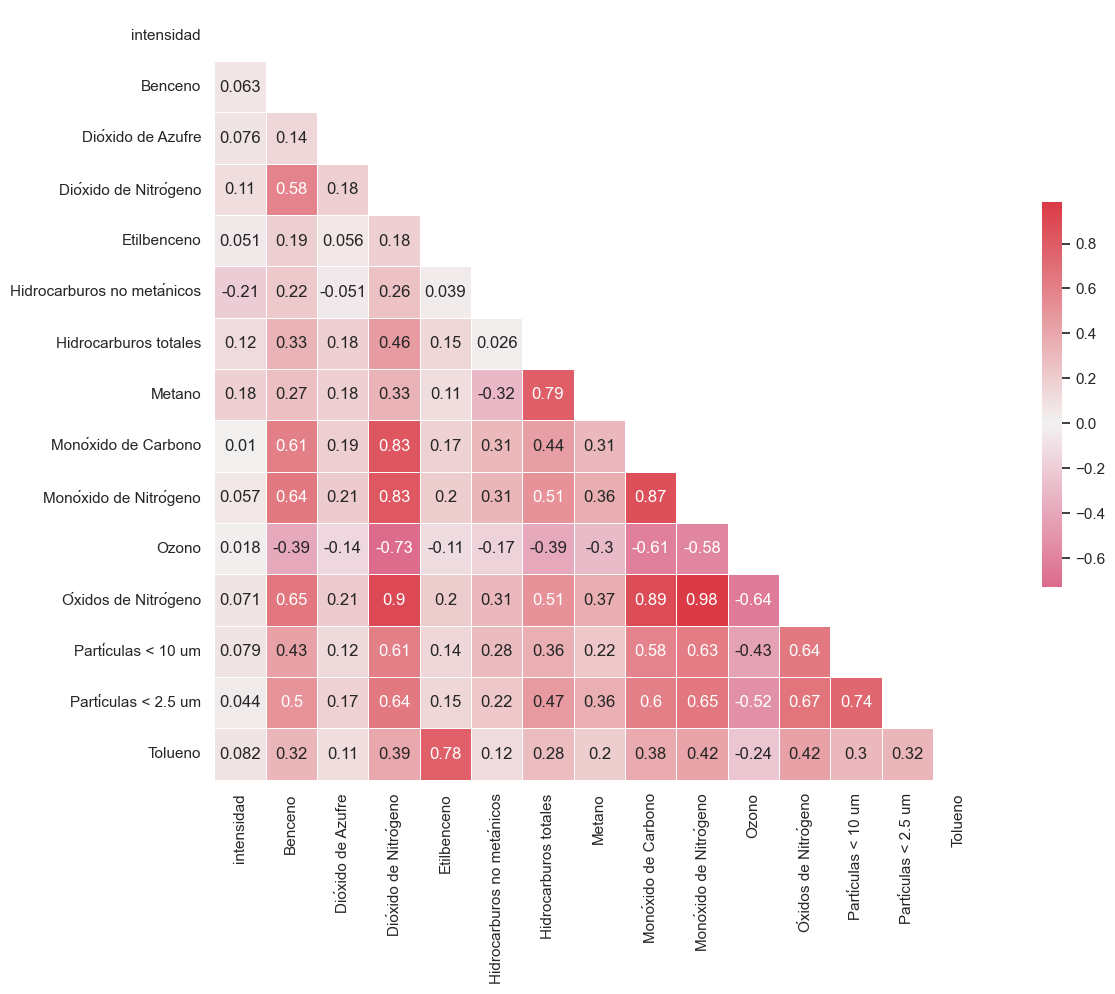

In [7]:
# Se crea un gráfico de correlacion entre tráfico y valores de contaminación

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

100%|██████████| 12/12 [00:04<00:00,  2.60it/s]


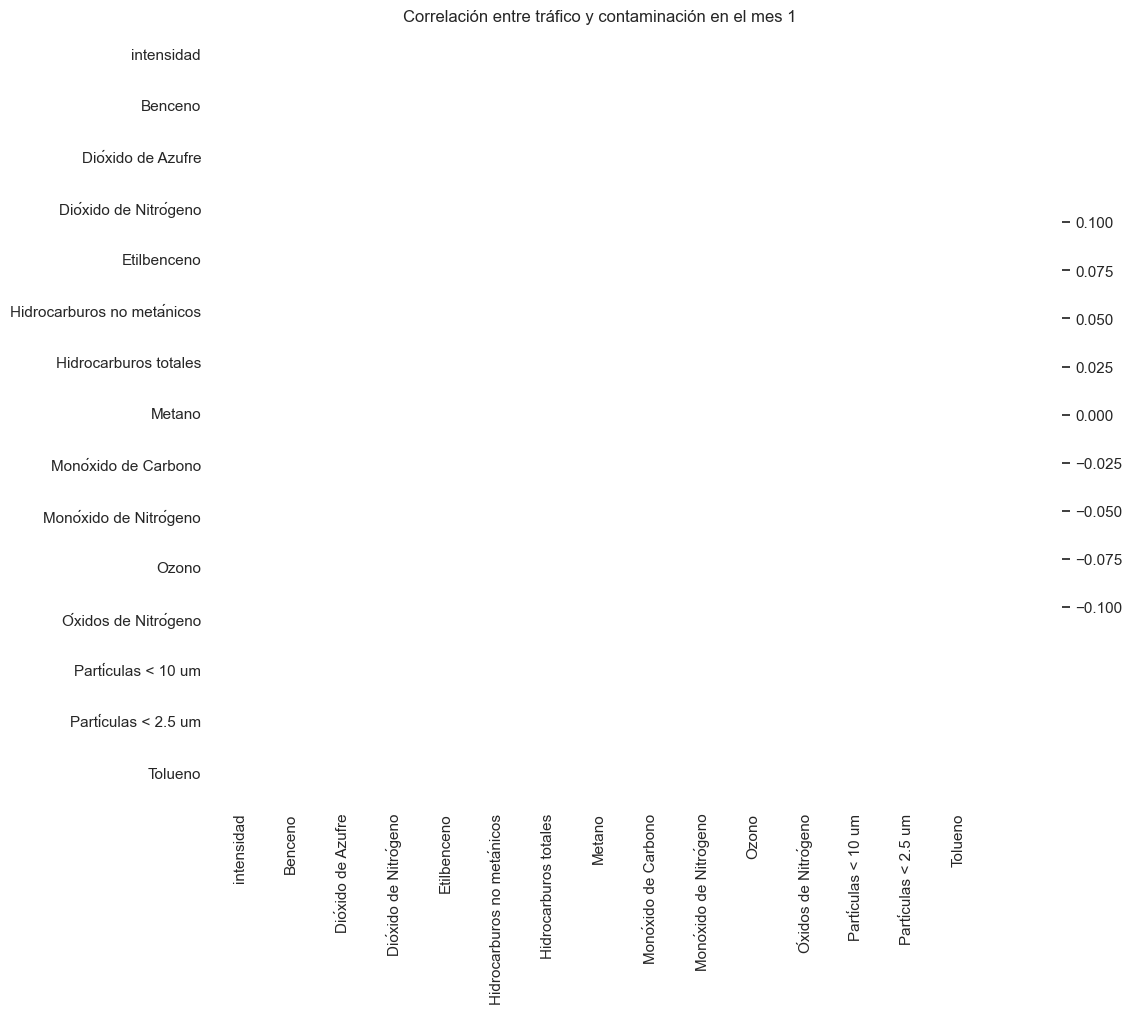

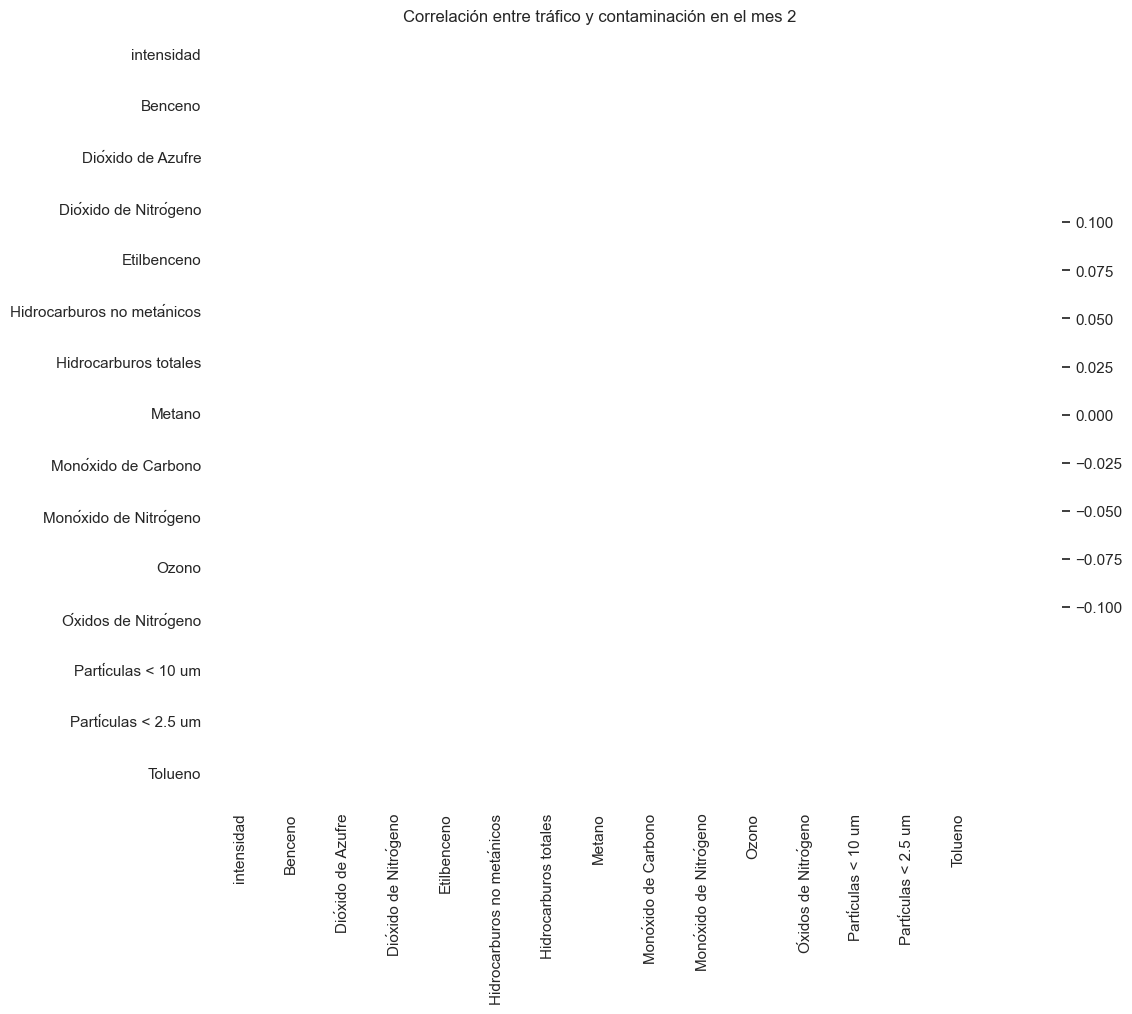

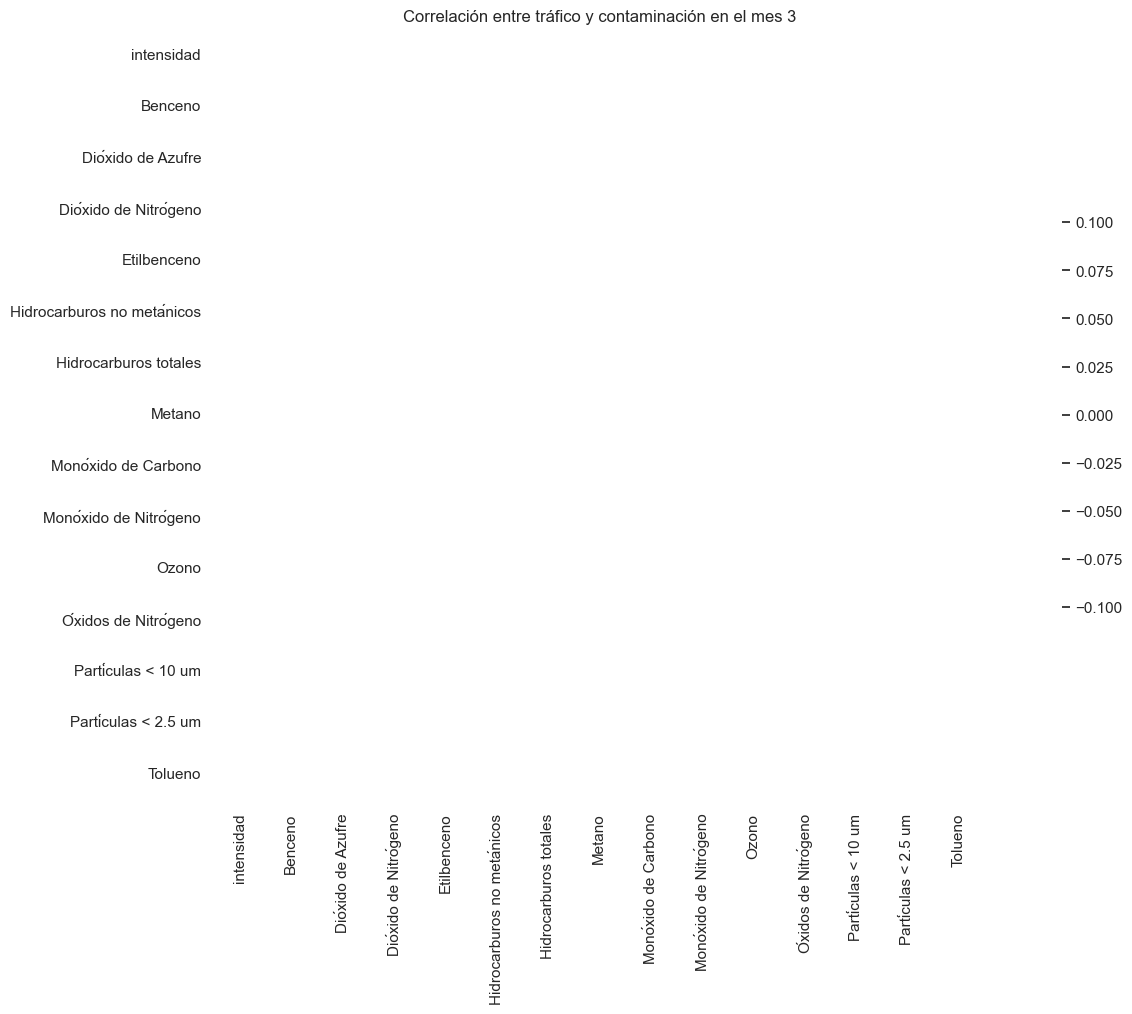

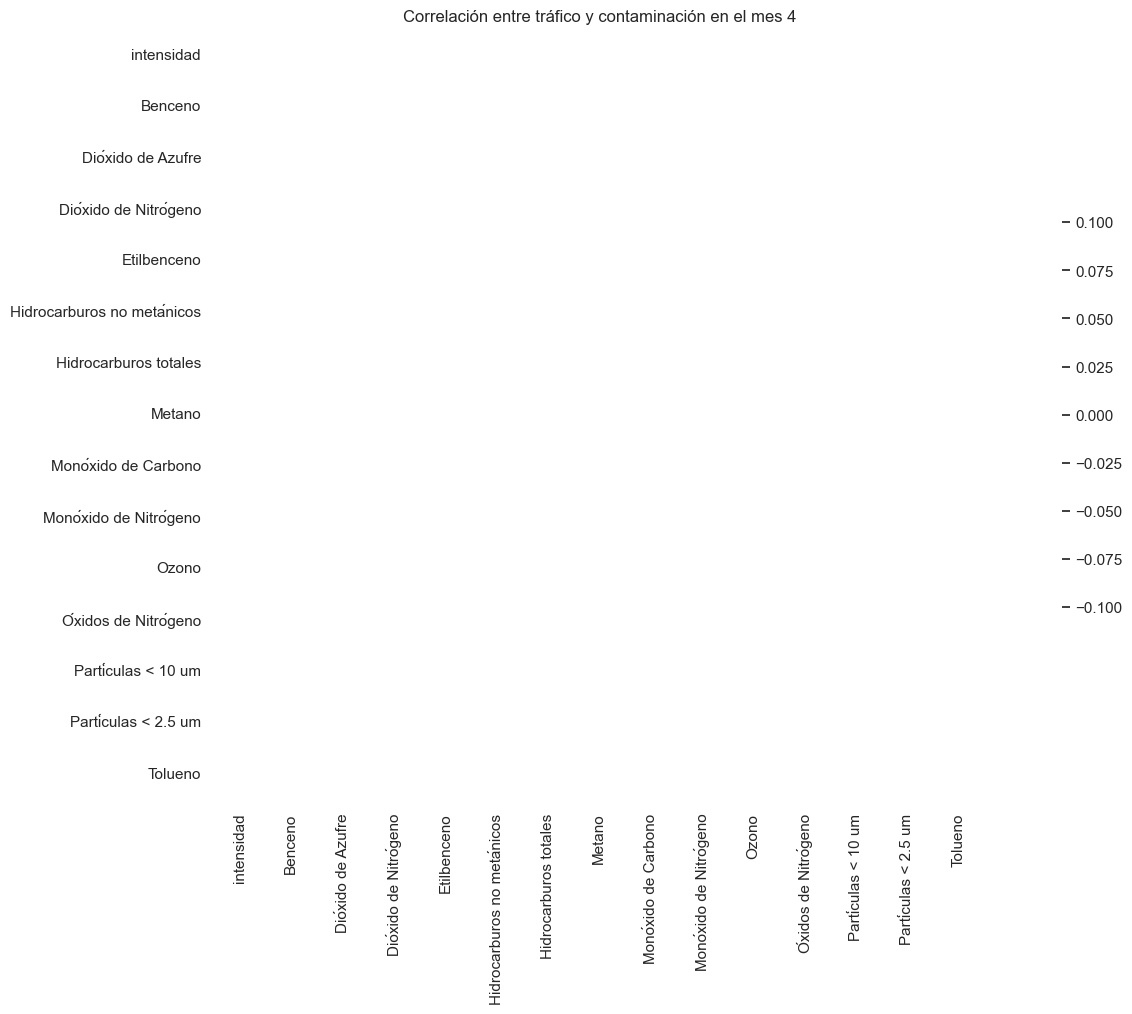

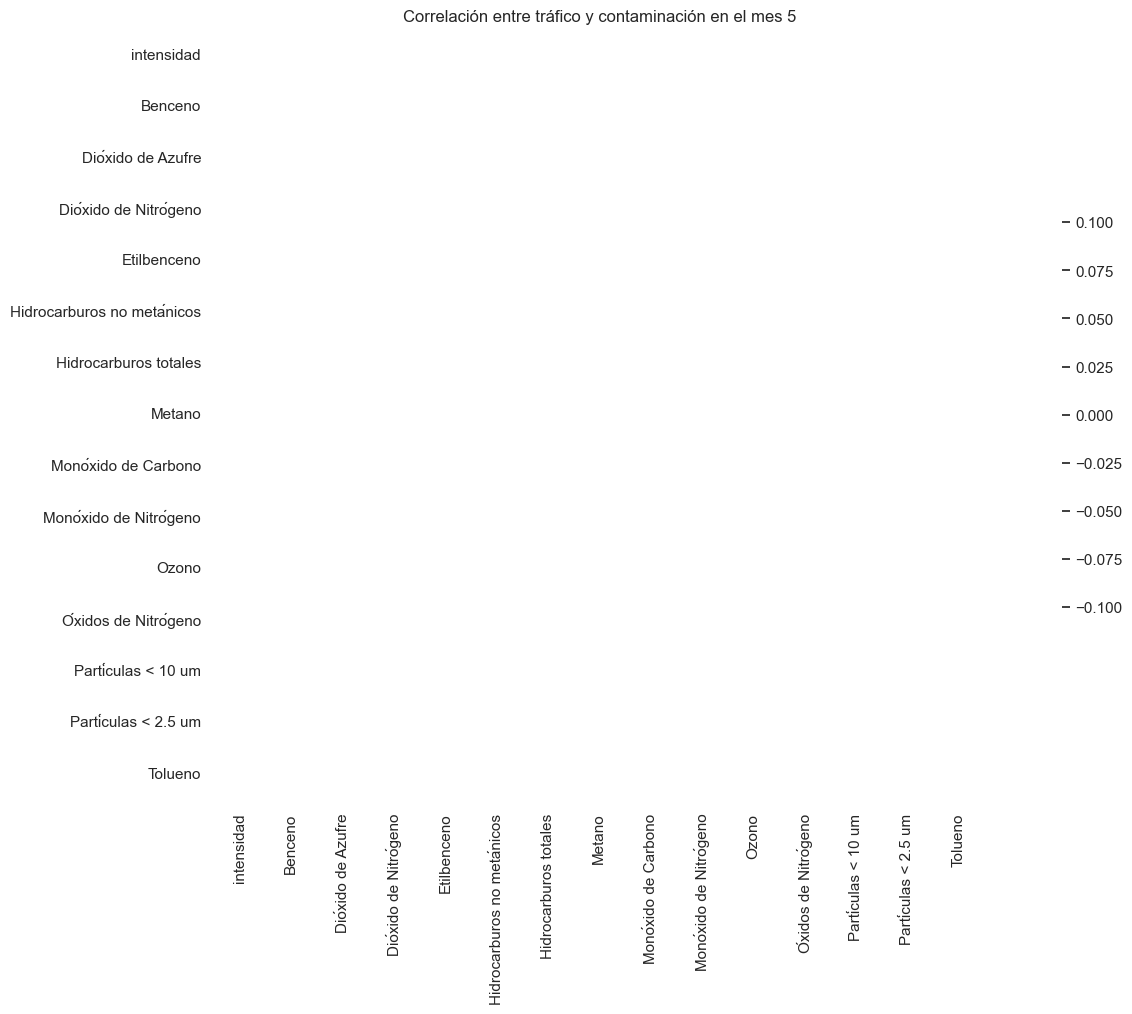

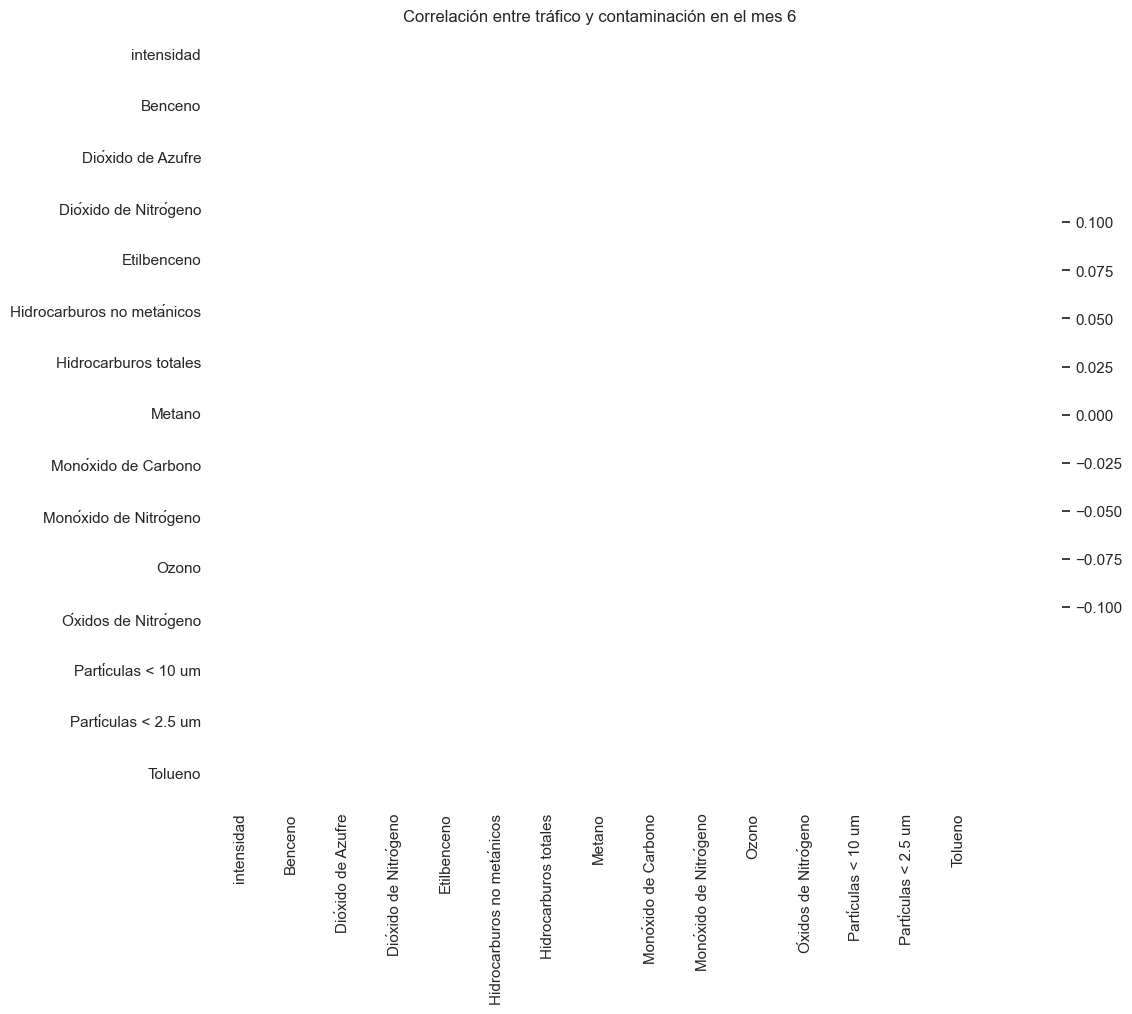

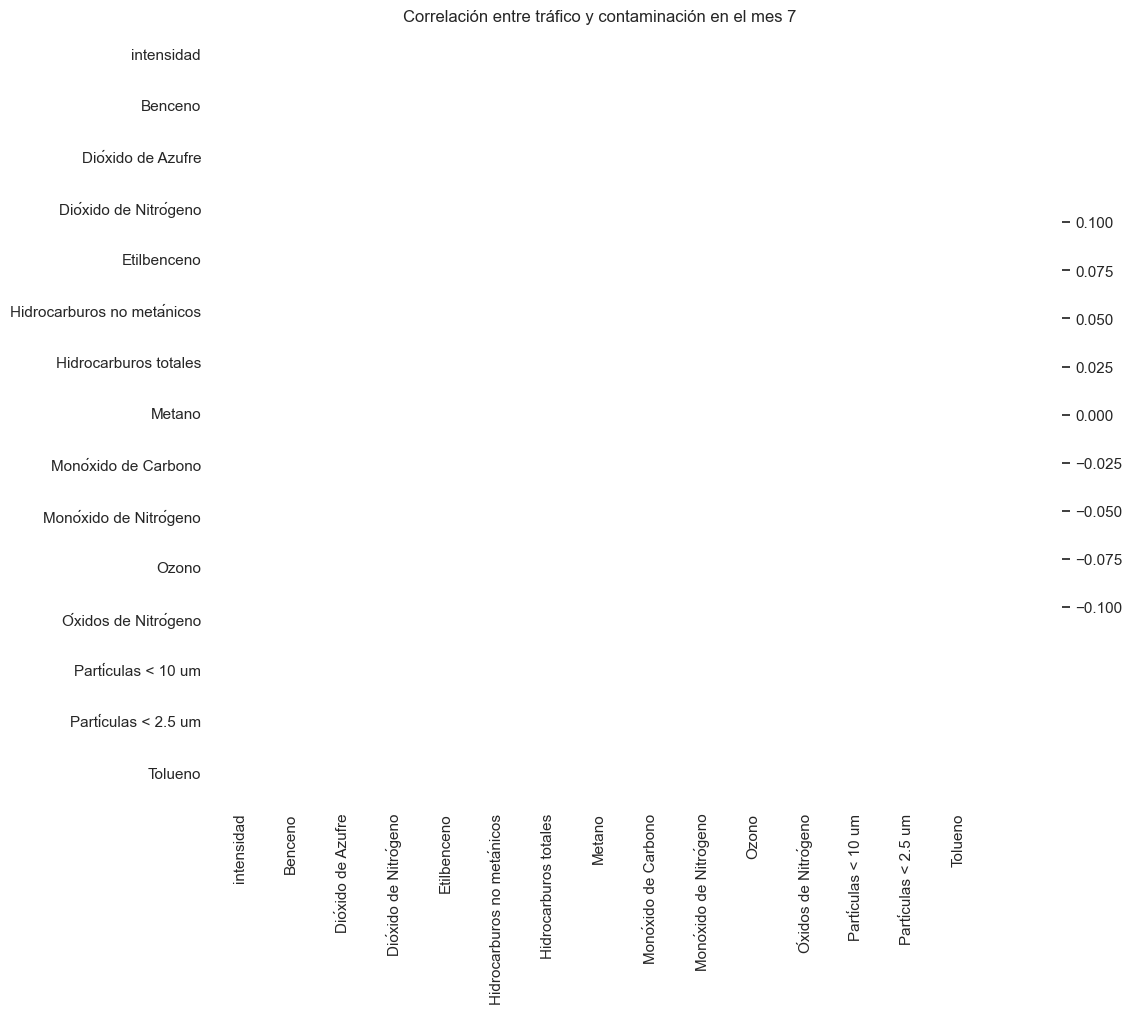

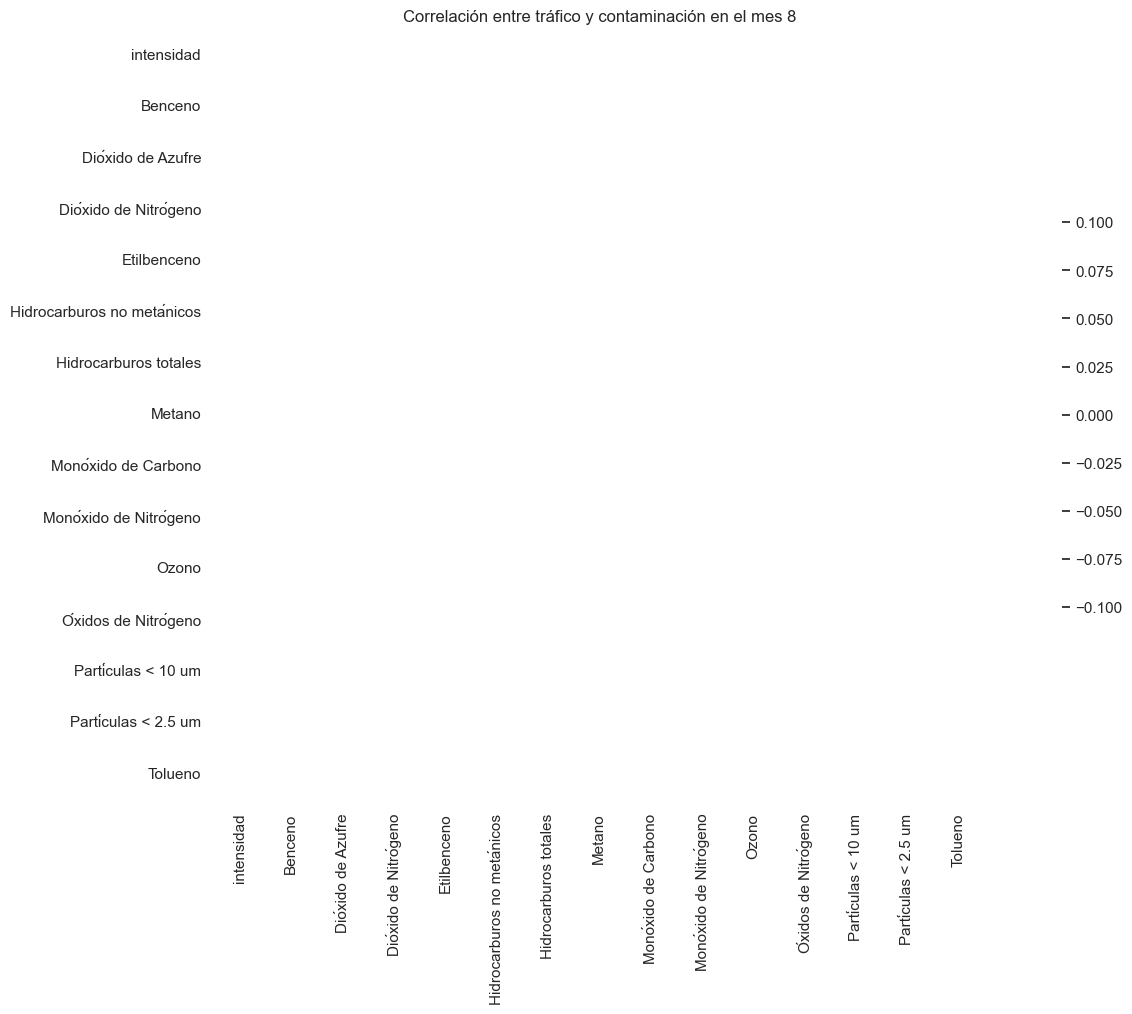

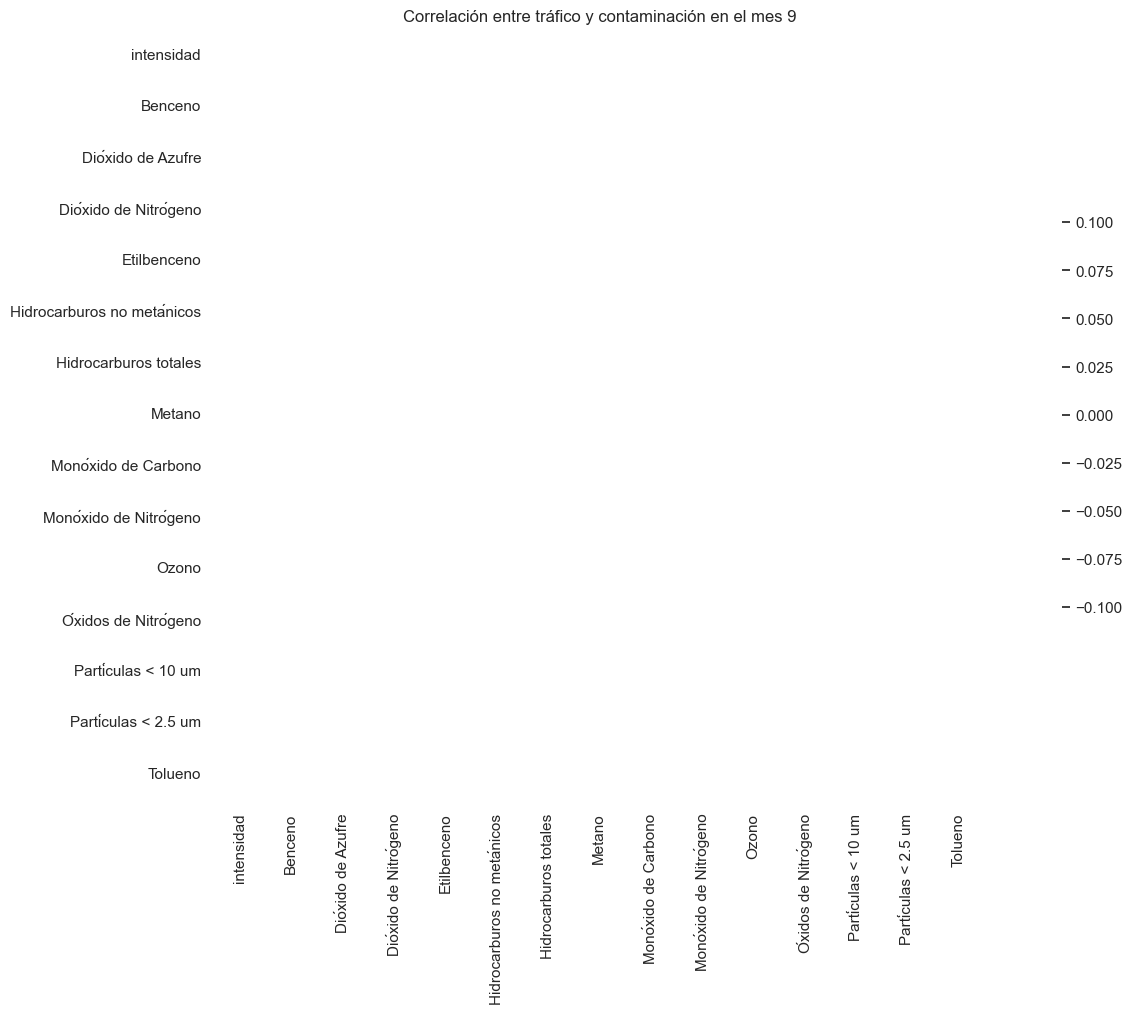

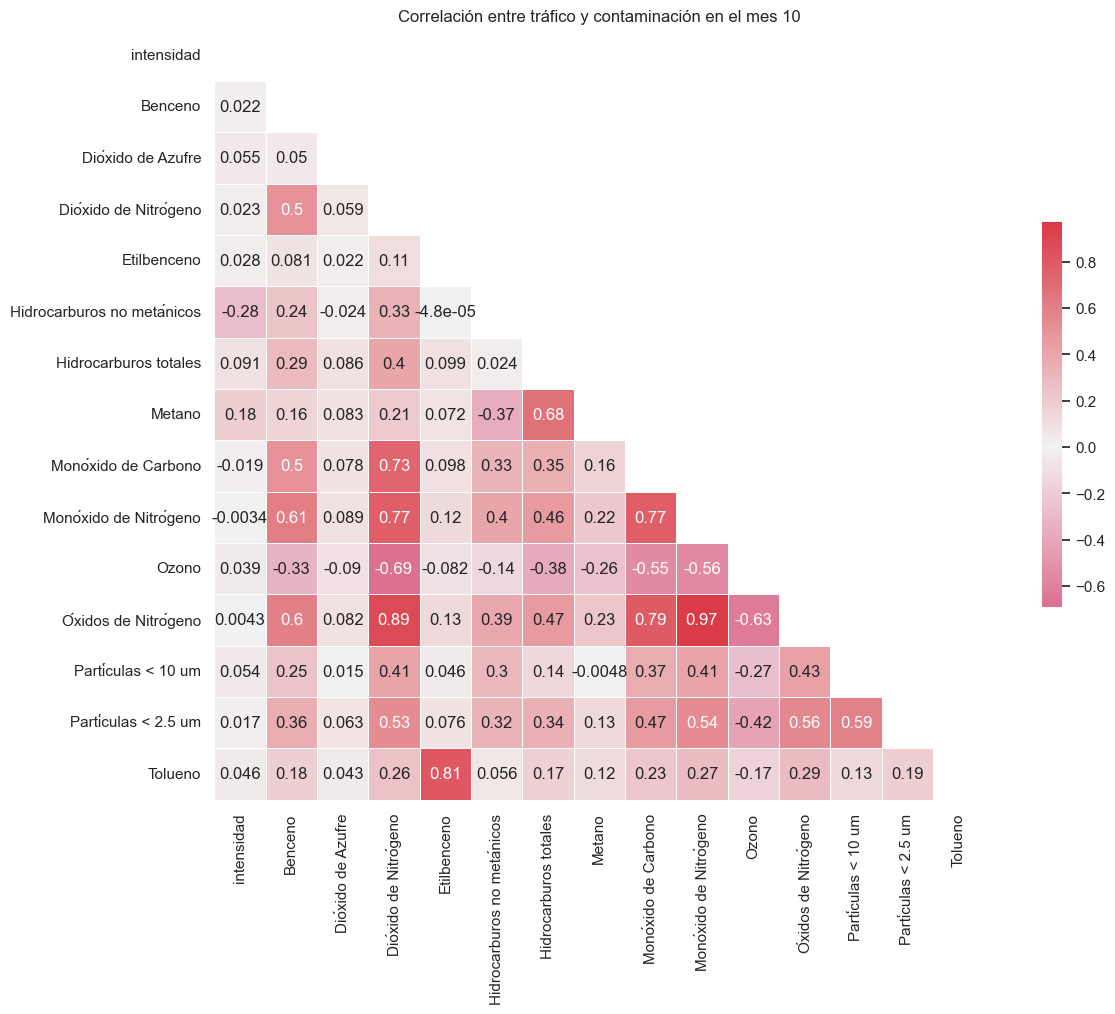

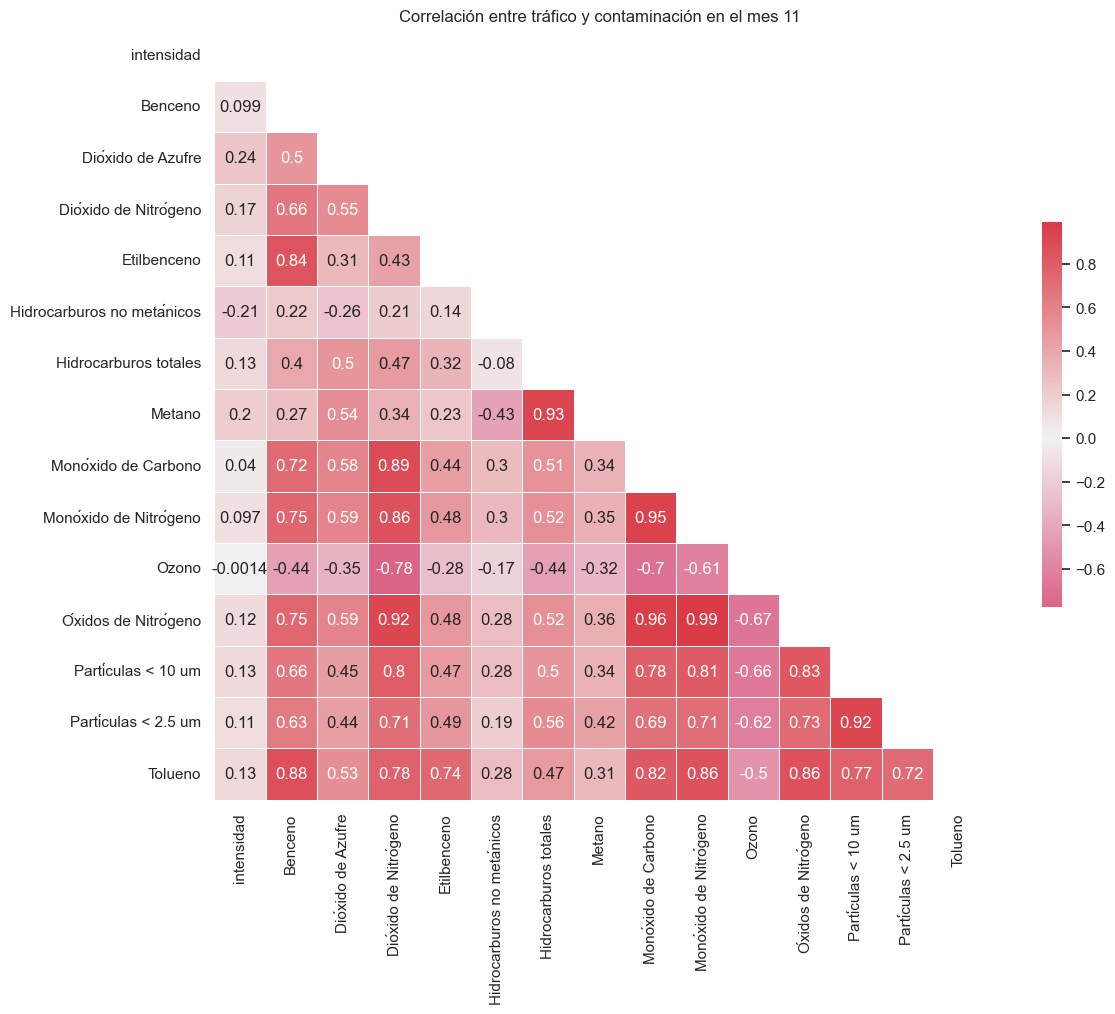

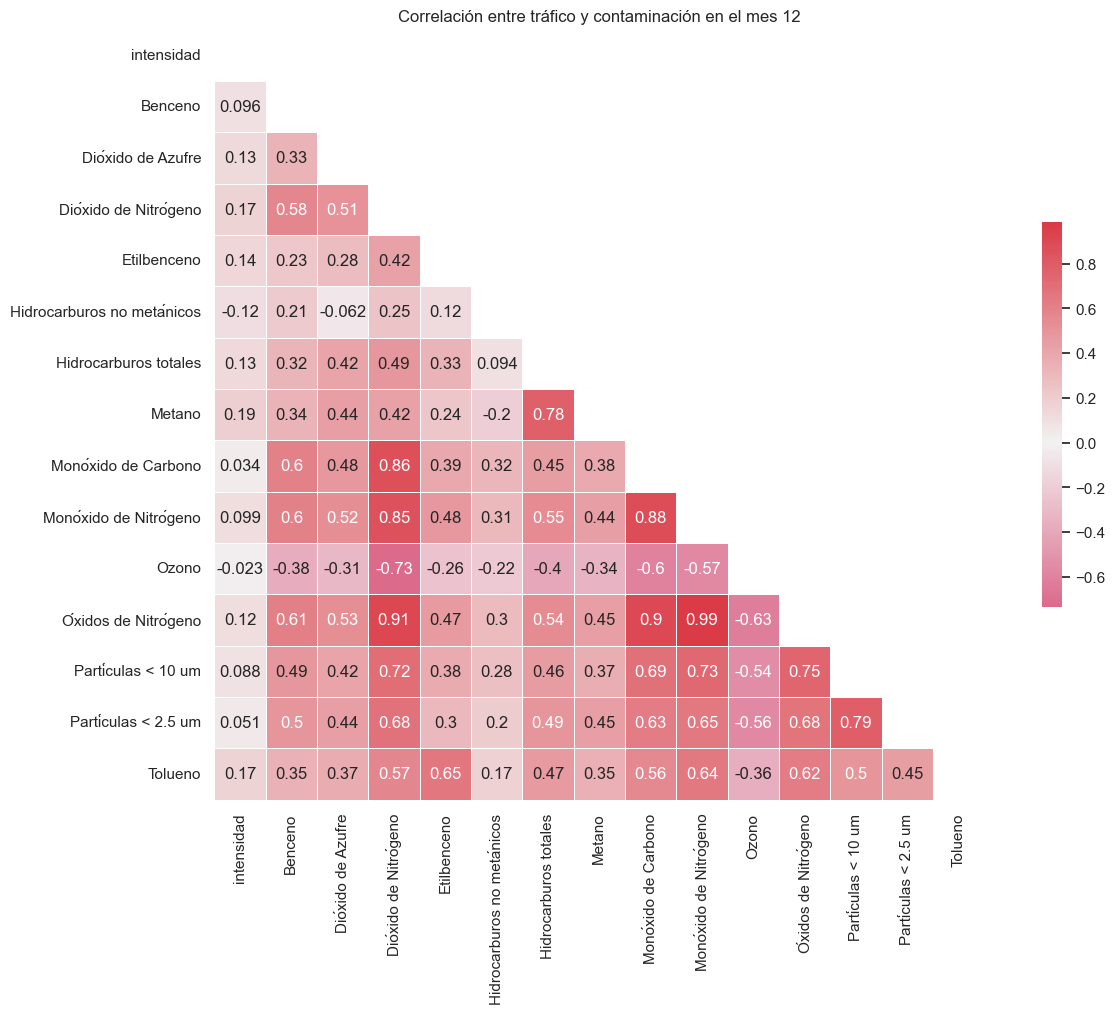

In [18]:
# Ahora voy a hacer la misma gráfica pero por meses

df['fecha'] = pd.to_datetime(df['fecha'])

df.fecha[3].month

for i in tqdm(range(12)):

    df_mes = df.loc[df.fecha.dt.month == i+1]

    plt.figure(figsize=(15, 10))

    sns.set(style='white')

    mask=np.triu(np.ones_like(df_mes.corr(), dtype=bool))

    cmap=sns.diverging_palette(0, 10, as_cmap=True)

    plt.title(f'Correlación entre tráfico y contaminación en el mes {i+1}')

    sns.heatmap(df_mes.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5});

In [31]:
df.loc[df.fecha.dt.strftime('%m') == '03']

,fecha,intensidad,estacion,unidad_medida,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Etilbenceno,Hidrocarburos no metánicos,Hidrocarburos totales,Metano,Monóxido de Carbono,Monóxido de Nitrógeno,Ozono,Óxidos de Nitrógeno,Partículas < 10 um,Partículas < 2.5 um,Tolueno


In [35]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.fecha.dt.month.unique()

array([12, 11, 10])

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head(5)

,fecha,intensidad,estacion,magnitud,unidad_medida,valores
0,2022-12-10 10:00:00,349.37503,Escuelas Aguirre,Monóxido de Nitrógeno,ug/m3,3.0
1,2022-12-10 10:00:00,349.37503,Calle Farolillo,Dióxido de Nitrógeno,ug/m3,16.0
2,2022-12-10 10:00:00,349.37503,Pza. del Carmen,Óxidos de Nitrógeno,ug/m3,46.0
3,2022-12-10 10:00:00,349.37503,Méndez Álvaro,Dióxido de Nitrógeno,ug/m3,20.0
4,2022-12-10 10:00:00,349.37503,Urb. Embajada (Barajas),Partículas < 10 um,ug/m3,13.0
